Projeto: Assistente de Pesquisa Multitópico

Descrição Geral:
Crie um assistente virtual que auxilia pesquisadores a encontrar, resumir e organizar informações sobre diferentes tópicos, coordenando múltiplos agentes especializados em áreas distintas. O sistema permitirá consultas avançadas e a integração de várias fontes de dados, como artigos científicos, blogs, notícias e fóruns.

Etapas do Projeto:
1. Definição dos Objetivos

    Facilitar a busca de informações confiáveis em áreas específicas.
    Resumir conteúdo longo em trechos curtos e compreensíveis.
    Fornecer um painel de visualização que organiza as informações encontradas por relevância.

2. Estruturação do Sistema

Utilize o LangGraph para criar agentes com as seguintes responsabilidades:

    Agente Coletor: Faz a busca inicial nas fontes de dados especificadas.
    Agente Resumidor: Condensa textos longos em resumos relevantes.
    Agente Organizador: Classifica e organiza os dados coletados por relevância ou área de conhecimento.
    Agente Analítico: Gera insights, como estatísticas ou gráficos, a partir dos dados coletados.

3. Fluxo de Trabalho

O fluxo do LangGraph pode ser configurado da seguinte forma:

    Entrada do Usuário: O usuário insere a consulta.
    Distribuição da Tarefa: A consulta é distribuída para diferentes agentes com base nos tópicos.
    Processamento dos Dados: Cada agente realiza sua tarefa e retorna o resultado ao nó central.
    Apresentação Final: O sistema organiza as informações e apresenta ao usuário em uma interface amigável.

4. Tecnologias Adicionais

    Integrações com APIs: Utilize APIs como arXiv, Semantic Scholar, Google Scholar ou OpenAI para fontes científicas.
    Frontend: Crie uma interface visual usando frameworks como React ou Dash.
    Backend: Use Python (FastAPI ou Flask) para coordenar as chamadas entre agentes e exibir os resultados.

Exemplo de Aplicação:
O usuário faz a seguinte pergunta:
"Quais são os avanços mais recentes em baterias de lítio para carros elétricos?"

Resposta do Sistema:

    Resumo de artigos científicos (10 linhas por documento).
    Gráfico de tendências tecnológicas baseado em palavras-chave.
    Lista de fontes confiáveis com links para leitura aprofundada.

In [15]:
from IPython.display import  Image, display
from langchain_openai import ChatOpenAI
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_community.utilities import WikipediaAPIWrapper 
from langchain_community.tools import WikipediaQueryRun
from langgraph.prebuilt import create_react_agent  
from dotenv import load_dotenv
from IPython.display import  Image, display
import os
load_dotenv()

True

In [4]:
# LLM Setup 
model = ChatOpenAI(openai_api_key=os.getenv('OPENAI_API_KEY'), model="gpt-4o-mini-2024-07-18")

In [5]:
# Define the State
class State(TypedDict):
    
    # Define messages with metadata
    messages: Annotated[list, add_messages]

In [7]:
# Initialize Wikipedia API wrapper to fetch top 1 result 
api_wrapper = WikipediaAPIWrapper(top_k_results=1)    
# Create a Wikipedia query tool using the API wrapper 
wikipedia_tool = WikipediaQueryRun(api_wrapper=api_wrapper)  
tools = [wikipedia_tool]

In [8]:
model_with_tools = model.bind_tools(tools)

In [18]:
def search_agent(state: State):
    return {"messages": [model.invoke(state["messages"])]}

In [19]:
# Initialize StateGraph
graph_builder = StateGraph(State)

# Add chatbot node to the graph
graph_builder.add_node("Search Agent", search_agent)

# Define the start and end of the conversation flow
graph_builder.add_edge(START, "Search Agent")
graph_builder.add_edge("Search Agent", END)

# Compile the graph to prepare for execution
graph = graph_builder.compile()

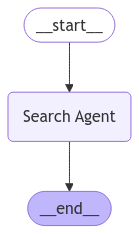

In [16]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
# Define a function to execute the chatbot based on user input
def stream_graph_updates(user_input: str):
    
    # Start streaming events from the graph with the user's input
    for event in graph.stream({"messages": [("user", user_input)]}):
        
        # Retrieve and print the chatbot node responses
        for item in event.values():
            print("Agent:", item["messages"][0].content)

In [28]:
stream_graph_updates("Quais são os maiores e mais recentes descobertas sobre ia generativa")

Agent: Até outubro de 2023, algumas das maiores e mais recentes descobertas e avanços em inteligência artificial generativa incluem:

1. **Modelos de Linguagem Avançados**: Modelos como o GPT-4 e outros desenvolvimentos de modelos de linguagem têm mostrado capacidades impressionantes em geração de texto, compreensão de contexto e realização de tarefas complexas de linguagem natural.

2. **Multimodalidade**: Avanços em modelos que podem processar e gerar dados em diferentes formatos (texto, imagem, áudio) têm se tornado cada vez mais comuns. Exemplos incluem modelos como DALL-E e CLIP, que combinam texto e imagens para criar conteúdo visual a partir de descrições textuais.

3. **Aprimoramento de Ferramentas Criativas**: Ferramentas de IA generativa estão se tornando populares em áreas criativas, como arte, música e design. Esses modelos auxiliam artistas e criadores a explorar novas ideias e acelerar o processo criativo.

4. **Controle e Personalização**: Pesquisas têm se concentrado em